# 3.3 モデルの実装

### 共通事前処理

In [1]:
# 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1

In [2]:
# 共通事前処理

# 余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

# 必要ライブラリのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib日本語化対応
import japanize_matplotlib

# データフレーム表示用関数
from IPython.display import display

# 表示オプション調整
# numpyの浮動小数点の表示精度
np.set_printoptions(suppress=True, precision=4)
# pandasでの浮動小数点の表示精度
pd.options.display.float_format = '{:.4f}'.format
# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)
# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14
# 乱数の種
random_seed = 123

### 乳がん疾患データセット

[UCIデータセットサイト](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

#### 分析データイメージ
<img src="https://www.researchgate.net/profile/Nick_Street/publication/2512520/figure/fig2/AS:279373199495169@1443619169198/Snakes-After-Convergence-to-Cell-Nucleus-Boundaries-These-contours-are-the-nal.png" alt="Drawing" width="40%" align="left">


### 3.3.1 (1) データ読み込み

In [3]:
# ガン疾患データセットのロード

# ライブラリのimport
from sklearn.datasets import load_breast_cancer

# データのロード
cancer = load_breast_cancer()

# データの注釈を読む (kj: DESCR はおそらく統計情報)
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
# データフレームへの取り込み

columns = [
    '半径_平均', 'きめ_平均', '周長_平均', '面積_平均', 
    '平滑度_平均','コンパクト度_平均', '凹面_平均',
    '凹点_平均', '対称性_平均', 'フラクタル度_平均',
    '半径_標準誤差', 'きめ_標準誤差', '周長_標準誤差',
    '面積_標準誤差', '平滑度_標準誤差',
    'コンパクト度_標準誤差', '凹面_標準誤差', '凹点_標準誤差',
    '対称性_標準誤差', 'フラクタル度_標準誤差',
    '半径_最大', 'きめ_最大', '周長_最大', '面積_最大', 
    '平滑度_最大','コンパクト度_最大', '凹面_最大', '凹点_最大', 
    '対称性_最大', 'フラクタル度_最大'
]

# ロードしたデータのデータフレームへの取り込み
df = pd.DataFrame(cancer.data, columns=columns)

# 正解データの取得
y = pd.Series(cancer.target)

### 3.3.2 (2) データ確認

In [6]:
# 入力データの表示

# 入力データの先頭20行目から24行目までの表示
display(df[20:25])

,半径_平均,きめ_平均,周長_平均,面積_平均,平滑度_平均,コンパクト度_平均,凹面_平均,凹点_平均,対称性_平均,フラクタル度_平均,半径_標準誤差,きめ_標準誤差,周長_標準誤差,面積_標準誤差,平滑度_標準誤差,コンパクト度_標準誤差,凹面_標準誤差,凹点_標準誤差,対称性_標準誤差,フラクタル度_標準誤差,半径_最大,きめ_最大,周長_最大,面積_最大,平滑度_最大,コンパクト度_最大,凹面_最大,凹点_最大,対称性_最大,フラクタル度_最大
20,13.0800,15.7100,85.6300,520.0000,0.1075,0.1270,0.0457,0.0311,0.1967,0.0681,0.1852,0.7477,1.3830,14.6700,0.0041,0.0190,0.0170,0.0065,0.0168,0.0024,14.5000,20.4900,96.0900,630.5000,0.1312,0.2776,0.1890,0.0728,0.3184,0.0818
21,9.5040,12.4400,60.3400,273.9000,0.1024,0.0649,0.0296,0.0208,0.1815,0.0691,0.2773,0.9768,1.9090,15.7000,0.0096,0.0143,0.0198,0.0142,0.0203,0.0030,10.2300,15.6600,65.1300,314.9000,0.1324,0.1148,0.0887,0.0623,0.2450,0.0777
22,15.3400,14.2600,102.5000,704.4000,0.1073,0.2135,0.2077,0.0976,0.2521,0.0703,0.4388,0.7096,3.3840,44.9100,0.0068,0.0533,0.0645,0.0225,0.0367,0.0044,18.0700,19.0800,125.1000,980.9000,0.1390,0.5954,0.6305,0.2393,0.4667,0.0995
23,21.1600,23.0400,137.2000,1404.0000,0.0943,0.1022,0.1097,0.0863,0.1769,0.0528,0.6917,1.1270,4.3030,93.9900,0.0047,0.0126,0.0171,0.0104,0.0108,0.0020,29.1700,35.5900,188.0000,2615.0000,0.1401,0.2600,0.3155,0.2009,0.2822,0.0753
24,16.6500,21.3800,110.0000,904.6000,0.1121,0.1457,0.1525,0.0917,0.1995,0.0633,0.8068,0.9017,5.4550,102.6000,0.0060,0.0188,0.0274,0.0113,0.0147,0.0028,26.4600,31.5600,177.0000,2215.0000,0.1805,0.3578,0.4695,0.2095,0.3613,0.0956


In [7]:
# 正解データの表示

# 正解データの先頭20行目から24行目の表示
print(y[20:25])

20    1
21    1
22    0
23    0
24    0
dtype: int64


In [9]:
# データの統計情報確認

# 入力データの行数、列数の確認
print(df.shape)
print()

# 正解データの1と0の個数確認
print(y.value_counts())

(569, 30)

1    357
0    212
dtype: int64


In [10]:
# 散布図描画の準備
# データを正解データ=0のグループと正解データ=1のグループに分割する

# 正解データ = 0 (悪性)のデータ抽出
df0 = df[y==0]

# 正解データ = 1(良性)のデータ抽出
df1 = df[y==1]

display(df0.head())
display(df1.head())

,半径_平均,きめ_平均,周長_平均,面積_平均,平滑度_平均,コンパクト度_平均,凹面_平均,凹点_平均,対称性_平均,フラクタル度_平均,半径_標準誤差,きめ_標準誤差,周長_標準誤差,面積_標準誤差,平滑度_標準誤差,コンパクト度_標準誤差,凹面_標準誤差,凹点_標準誤差,対称性_標準誤差,フラクタル度_標準誤差,半径_最大,きめ_最大,周長_最大,面積_最大,平滑度_最大,コンパクト度_最大,凹面_最大,凹点_最大,対称性_最大,フラクタル度_最大
0,17.9900,10.3800,122.8000,1001.0000,0.1184,0.2776,0.3001,0.1471,0.2419,0.0787,1.0950,0.9053,8.5890,153.4000,0.0064,0.0490,0.0537,0.0159,0.0300,0.0062,25.3800,17.3300,184.6000,2019.0000,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,20.5700,17.7700,132.9000,1326.0000,0.0847,0.0786,0.0869,0.0702,0.1812,0.0567,0.5435,0.7339,3.3980,74.0800,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035,24.9900,23.4100,158.8000,1956.0000,0.1238,0.1866,0.2416,0.1860,0.2750,0.0890
2,19.6900,21.2500,130.0000,1203.0000,0.1096,0.1599,0.1974,0.1279,0.2069,0.0600,0.7456,0.7869,4.5850,94.0300,0.0062,0.0401,0.0383,0.0206,0.0225,0.0046,23.5700,25.5300,152.5000,1709.0000,0.1444,0.4245,0.4504,0.2430,0.3613,0.0876
3,11.4200,20.3800,77.5800,386.1000,0.1425,0.2839,0.2414,0.1052,0.2597,0.0974,0.4956,1.1560,3.4450,27.2300,0.0091,0.0746,0.0566,0.0187,0.0596,0.0092,14.9100,26.5000,98.8700,567.7000,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
4,20.2900,14.3400,135.1000,1297.0000,0.1003,0.1328,0.1980,0.1043,0.1809,0.0588,0.7572,0.7813,5.4380,94.4400,0.0115,0.0246,0.0569,0.0188,0.0176,0.0051,22.5400,16.6700,152.2000,1575.0000,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768


,半径_平均,きめ_平均,周長_平均,面積_平均,平滑度_平均,コンパクト度_平均,凹面_平均,凹点_平均,対称性_平均,フラクタル度_平均,半径_標準誤差,きめ_標準誤差,周長_標準誤差,面積_標準誤差,平滑度_標準誤差,コンパクト度_標準誤差,凹面_標準誤差,凹点_標準誤差,対称性_標準誤差,フラクタル度_標準誤差,半径_最大,きめ_最大,周長_最大,面積_最大,平滑度_最大,コンパクト度_最大,凹面_最大,凹点_最大,対称性_最大,フラクタル度_最大
19,13.5400,14.3600,87.4600,566.3000,0.0978,0.0813,0.0666,0.0478,0.1885,0.0577,0.2699,0.7886,2.0580,23.5600,0.0085,0.0146,0.0239,0.0132,0.0198,0.0023,15.1100,19.2600,99.7000,711.2000,0.1440,0.1773,0.2390,0.1288,0.2977,0.0726
20,13.0800,15.7100,85.6300,520.0000,0.1075,0.1270,0.0457,0.0311,0.1967,0.0681,0.1852,0.7477,1.3830,14.6700,0.0041,0.0190,0.0170,0.0065,0.0168,0.0024,14.5000,20.4900,96.0900,630.5000,0.1312,0.2776,0.1890,0.0728,0.3184,0.0818
21,9.5040,12.4400,60.3400,273.9000,0.1024,0.0649,0.0296,0.0208,0.1815,0.0691,0.2773,0.9768,1.9090,15.7000,0.0096,0.0143,0.0198,0.0142,0.0203,0.0030,10.2300,15.6600,65.1300,314.9000,0.1324,0.1148,0.0887,0.0623,0.2450,0.0777
37,13.0300,18.4200,82.6100,523.8000,0.0898,0.0377,0.0256,0.0292,0.1467,0.0586,0.1839,2.3420,1.1700,14.1600,0.0044,0.0049,0.0134,0.0116,0.0267,0.0018,13.3000,22.8100,84.4600,545.9000,0.0970,0.0462,0.0483,0.0501,0.1987,0.0617
46,8.1960,16.8400,51.7100,201.9000,0.0860,0.0594,0.0159,0.0059,0.1769,0.0650,0.1563,0.9567,1.0940,8.2050,0.0090,0.0165,0.0159,0.0059,0.0257,0.0026,8.9640,21.9600,57.2600,242.2000,0.1297,0.1357,0.0688,0.0256,0.3105,0.0741


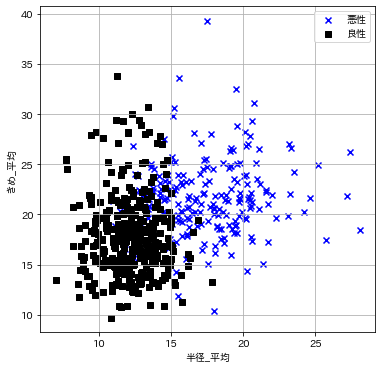

In [11]:
# 散布図表示

# グラフのサイズ設定
plt.figure(figsize=(6,6))

# 目的変数が0のデータを散布図表示
plt.scatter(df0['半径_平均'], df0['きめ_平均'], marker='x',
    c='b', label='悪性')

# 目的変数が1のデータを散布図表示
plt.scatter(df1['半径_平均'], df1['きめ_平均'], marker='s',
    c='k', label='良性')

# 格子表示
plt.grid()

# ラベル表示
plt.xlabel('半径_平均')
plt.ylabel('きめ_平均')

# 凡例表示
plt.legend()

# グラフ表示
plt.show()

### 3.3.3 (3) データ前処理

In [12]:
# 入力データを2項目だけに絞り込む

input_columns = ['半径_平均', 'きめ_平均']
x = df[input_columns]
display(x.head())

,半径_平均,きめ_平均
0,17.9900,10.3800
1,20.5700,17.7700
2,19.6900,21.2500
3,11.4200,20.3800
4,20.2900,14.3400


### 3.3.4 (4) データ分割

In [13]:
# 訓練用データと検証用データの分割

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
    train_size=0.7, test_size=0.3, random_state=random_seed)

In [14]:
# 分割結果の確認 (要素数)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 2)
(171, 2)
(398,)
(171,)


In [23]:
# 分割結果の確認 (データの内容)

display(x_train.head())
display(x_test.head())
display(y_train.head())
display(y_test.head())

,半径_平均,きめ_平均
559,11.5100,23.9300
295,13.7700,13.2700
264,17.1900,22.0700
125,13.8500,17.2100
280,19.1600,26.6000


,半径_平均,きめ_平均
333,11.2500,14.7800
273,9.7420,15.6700
201,17.5400,19.3200
178,13.0100,22.2200
85,18.4600,18.5200


559    1
295    1
264    0
125    1
280    0
dtype: int64

333    1
273    1
201    0
178    1
85     0
dtype: int64

### 3.3.5 (5) アルゴリズム選択

In [15]:
# アルゴリズム選定

from sklearn.linear_model import LogisticRegression
algorithm = LogisticRegression(random_state=random_seed)

### 3.3.6 (6) 学習

In [16]:
# 学習

algorithm.fit(x_train, y_train)
print(algorithm)

LogisticRegression(random_state=123)


### 3.3.7 (7) 予測

In [17]:
# 予測

# predict関数の呼出し
y_pred = algorithm.predict(x_test)

# 結果の確認
print(y_pred)

[1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1
 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0
 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1]


### 3.3.8 (8) 評価

In [18]:
# 正解データと予測結果の比較

# 正解データ　先頭から10個
# y_testはDataFrameなので、valuesによりNumPyに変換しておく
y_test10 = y_test[:10].values
print(y_test10)

# 予測結果　先頭から20個
y_pred10 = y_pred[:10]
print(y_pred10)

[1 1 0 1 0 1 1 0 1 1]
[1 1 0 1 0 1 1 1 1 1]


In [19]:
# 正解数のカウント

# 正解データ = 予測結果　
w1 = (y_test10 == y_pred10)
print(w1)

# 正解データの数
w2 = w1.sum()
print(w2)

[ True  True  True  True  True  True  True False  True  True]
9


In [21]:
# 精度の計算

# 正解数の計算
w = (y_test.values == y_pred)
correct = w.sum()

# 検証データ全体数の計算
N = len(w)

# 精度 = (正解数) / (検証データ全体数)
score = correct / N

# 結果表示
print(f'精度: {score:.04f}')

精度: 0.8772


In [22]:
# score関数の利用

# 実は精度は score関数で簡単に計算できる
score = algorithm.score(x_test, y_test)
print(f'score: {score:.04f}')

score: 0.8772


### 3.3.9 (9) チューニング

In [23]:
# モデルの精度を上げる

# オリジナルの30項目の入力データを使って、訓練データ、検証データを作り直す
x2_train, x2_test, y_train, y_test = train_test_split(df, y, 
    train_size=0.7, test_size=0.3, random_state=random_seed)

# ロジスティック回帰モデルのインスタンスを新たに作り直す
algorithm2 = LogisticRegression(random_state=random_seed)

# 訓練データで学習
algorithm2.fit(x2_train, y_train)

# 検証データで精度を確認
score2 = algorithm2.score(x2_test, y_test)
print(f'score: {score2:.04f}')

score: 0.9766


## (補足) 決定境界の表示
以下のセルでは、決定境界を表示するためのコードと、なぜそのような実装になるかの簡単な解説を記載しています。  
かなり高度は内容ですので、あまりPythonに詳しくない読者は、飛ばしてもらって構いません。  
Pytho実装に関心のある読者は参考とするようにしてください。

### ロジスティック回帰の内部構造

ロジスティック回帰モデルとは、  
(1) 入力変数を一次関数にかけて実数値を導出  
(2) (1)で得られた一次関数値をシグモイド関数と呼ばれる関数にかけて確率値を算出  
(3) (2)の結果が0.5より大きいか小さいかで予測結果が1か0かを判断
という処理を内部的に行っています。  

(1)で使われる一次関数の傾きと切片はそれぞれ変数coef_とintercept_で取得可能です。  
以下のコードではこの性質を使って、内部変数値を取得しています。

なお、このモデルでは多値分類用に、複数の内部変数を保持できるようになっています。
そのため、配列が2次元になっていますが、今回利用するのは2値分類なので、最初の要素([0])の値のみ利用します。



### 内部変数値の取得

In [24]:
# モデルの内部変数(切片と係数)の取得

# x1とx2の係数
w1 = algorithm.coef_[0][0]
w2 = algorithm.coef_[0][1]

# 切片の値
w0 = algorithm.intercept_[0]

# 値の確認
print(f'w0 = {w0:.4f}  w1 = {w1:.4f}  w2 = {w2:.4f}')

w0 = 19.6195  w1 = -1.0275  w2 = -0.2151


### boundary関数の定義

ここで得られた w0, w1, w2の値を用いると、散布図上に決定境界を示すための関数boundaryを決めることができます。  
具体的な関数と、それを導出するための式を以下のセルで示しました。

In [25]:
# 決定境界計算用関数

# 決定境界計算用関数
# 0 = w0 + w1 * x + w2 * y をyについて解くと以下の式になる
# y = -(w0 + w1 * x)/ w2

def boundary(algorithm, x):
    w1 = algorithm.coef_[0][0]
    w2 = algorithm.coef_[0][1]
    w0 = algorithm.intercept_[0]
    y = -(w0 + w1 * x)/w2
    return y

### 決定境界の端点値の計算

次に示すコードは、上で定義したboundary関数を利用して、決定境界を構成する端点の座標を求めるためのものです。  
あわせて、元のデータフレームからyの最小値と最大値を求め、グラフの見栄えをよくします 。

In [26]:
# 決定境界の端点値計算

# 決定境界の端点のx座標
x_range = np.array((df['半径_平均'].min(), df['半径_平均'].max()))

# 決定境界の端点のy座標
y_range = boundary(algorithm, x_range)

# yの上限、下限は散布図の点を元に決める
y_lim = (df['きめ_平均'].min(), df['きめ_平均'].max())

# 結果確認
print('端点のx座標: ', x_range)
print('端点のy座標: ', y_range)
print('グラフのy領域: ', y_lim)

端点のx座標:  [ 6.981 28.11 ]
端点のy座標:  [ 57.8637 -43.0655]
グラフのy領域:  (9.71, 39.28)


### 散布図と決定境界の表示

これですべての準備は整いました。  
次に示すコードでは、コード3-8で表示した学習データの散布図と、今求めた決定境界を重ね描きしています。

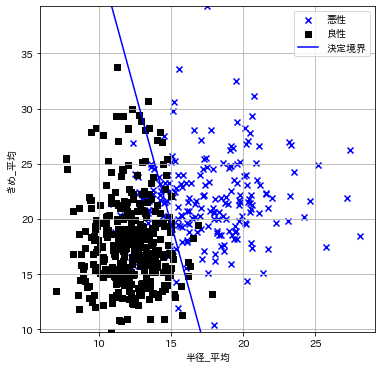

In [27]:
# 散布図と決定境界の表示

# グラフのサイズ設定
plt.figure(figsize=(6,6))

# 目的変数が0のデータを散布図表示
plt.scatter(df0['半径_平均'], df0['きめ_平均'], marker='x', c='b', label='悪性')

# 目的変数が1のデータを散布図表示
plt.scatter(df1['半径_平均'], df1['きめ_平均'], marker='s', c='k', label='良性')

# 決定境界
plt.plot(x_range, y_range, c='b', label='決定境界')

# 範囲指定
plt.ylim(y_lim)

# ラベル表示
plt.xlabel('半径_平均')
plt.ylabel('きめ_平均')

# 凡例表示
plt.legend()

# 方眼表示
plt.grid()

# グラフ表示
plt.show()